# <center>Comparison of TSE<center>

In [1]:
import numpy as np
import pandas as pd
import os
import sys
import glob

In [87]:
sTSEDir1='/project/bioinformatics/DLLab/STUDIES/ABIDE1/RawDataBIDS'\
        '/NYU/Derivatives/DLLabPipeline/IMPAC_TSE'
sTSEDir2='/project/bioinformatics/DLLab/STUDIES/ABIDE2/Source'\
        '/GroupBySite/ABIDEII-NYU_1/Derivatives/DLLabPipeline/IMPAC_TSE'
sTSEDir3='/project/bioinformatics/DLLab/STUDIES/ABIDE2/Source'\
        '/GroupBySite/ABIDEII-NYU_2/Derivatives/DLLabPipeline/IMPAC_TSE'
lsAtlases=['BASC064', 'BASC122', 'BASC197']

In [3]:
import sklearn.preprocessing as skp
import pickle as pkl

In [6]:
Data=pkl.load(open('/project/bioinformatics/DLLab/Cooper/Code/AutismProject/TrainTestDataWithConfounds.p', 'rb'))

In [7]:
sData='/project/bioinformatics/DLLab/Cooper/Code/AutismProject/AllDataWithConfounds.p'
#Dictionary that containes the whole dataset (train and test) in pd dataframe
[dXData, aYData] = pkl.load(open(sData, 'rb'))

In [8]:
pdIMPAC64=dXData['basc064'][[col for col in dXData['basc064'] if 'ROI' in col]]
pdIMPAC122=dXData['basc122'][[col for col in dXData['basc122'] if 'ROI' in col]]
pdIMPAC197=dXData['basc197'][[col for col in dXData['basc197'] if 'ROI' in col]]

In [9]:
from skimage.exposure import match_histograms

In [93]:
dData1={}
dData2={}
dData3={}

cScaler=skp.PowerTransformer()
cScaler=skp.RobustScaler()
cScaler2=skp.StandardScaler()
for sAtlas in lsAtlases:
    lsFiles1 = glob.glob(f'{sTSEDir1}/{sAtlas}/*.npy')
    #cInverseScaler=skp.RobustScaler()
    #cInverseScaler.fit(Data[0]['connectivity']['basc064'].flatten().reshape(-1, 1))
    aData1=np.stack([np.load(sFile) for sFile in lsFiles1])
    dData1[sAtlas] = aData1
    #dData1[sAtlas] = cInverseScaler.inverse_transform((cScaler.fit_transform(aData1)))
    
    lsFiles2 = glob.glob(f'{sTSEDir2}/{sAtlas}/*.npy')
    #cInverseScaler=skp.RobustScaler()
    #cInverseScaler.fit(Data[0]['connectivity']['basc122'].flatten().reshape(-1, 1))
    aData2=np.stack([np.load(sFile) for sFile in lsFiles2])
    dData2[sAtlas] = aData2    
    #dData2[sAtlas] = cInverseScaler.inverse_transform((cScaler.fit_transform(aData2)))
    #cInverseScaler=skp.RobustScaler()
    #cInverseScaler.fit(Data[0]['connectivity']['basc197'].flatten().reshape(-1, 1))
    lsFiles3 = glob.glob(f'{sTSEDir3}/{sAtlas}/*.npy')
    aData3=np.stack([np.load(sFile) for sFile in lsFiles3])
    dData3[sAtlas] = aData3
    #dData3[sAtlas] = cInverseScaler.inverse_transform((cScaler.fit_transform(aData3)))


In [130]:
lsABIDE1=[int(sFile.split('sub-')[-1].split('_')[0]) for sFile in lsFiles1]
lsABIDE2=list([int(sFile.split('sub-')[-1].split('_')[0]) for sFile in lsFiles2])
lsABIDE22=list([int(sFile.split('sub-')[-1].split('_')[0]) for sFile in lsFiles3])
lsABIDE2=lsABIDE2+lsABIDE22

In [95]:
aMatchedABIDE1_64=match_histograms(dData1['BASC064'].squeeze(), pdIMPAC64.values, multichannel=False)
aMatchedABIDE2_64=match_histograms(np.concatenate((dData2['BASC064'].squeeze(), 
                                                   dData3['BASC064'].squeeze()), axis=0),
                                   pdIMPAC64.values, multichannel=False)
aMatchedABIDE1_122=match_histograms(dData1['BASC122'].squeeze(), pdIMPAC122.values, multichannel=False)
aMatchedABIDE2_122=match_histograms(np.concatenate((dData2['BASC122'].squeeze(), 
                                                   dData3['BASC122'].squeeze()), axis=0),
                                   pdIMPAC122.values, multichannel=False)
aMatchedABIDE1_197=match_histograms(dData1['BASC197'].squeeze(), pdIMPAC197.values, multichannel=False)
aMatchedABIDE2_197=match_histograms(np.concatenate((dData2['BASC197'].squeeze(), 
                                                   dData3['BASC197'].squeeze()), axis=0),
                                   pdIMPAC197.values, multichannel=False)

In [101]:
pdABIDE1_64=pd.DataFrame(dData1['BASC064'].squeeze(), columns=pdIMPAC64.columns)
pdABIDE2_64=pd.DataFrame(np.concatenate((dData2['BASC064'].squeeze(), 
                         dData3['BASC064'].squeeze()), axis=0),
                         columns=pdIMPAC64.columns)
pdABIDE1_122=pd.DataFrame(dData1['BASC122'].squeeze(), columns=pdIMPAC122.columns)
pdABIDE2_122=pd.DataFrame(np.concatenate((dData2['BASC122'].squeeze(), 
                         dData3['BASC122'].squeeze()), axis=0),
                         columns=pdIMPAC122.columns)
pdABIDE1_197=pd.DataFrame(dData1['BASC197'].squeeze(), columns=pdIMPAC197.columns)
pdABIDE2_197=pd.DataFrame(np.concatenate((dData2['BASC197'].squeeze(), 
                         dData3['BASC197'].squeeze()), axis=0),
                         columns=pdIMPAC197.columns)

In [102]:
def fHistNormColumns(pdData, pdRef):
    for col in pdData.columns:
        pdData[col]=match_histograms(pdData[col], pdRef[col].values, multichannel=False)
    return pdData

In [103]:
pdABIDE1_64_Norm=fHistNormColumns(pdABIDE1_64, pdIMPAC64)
pdABIDE2_64_Norm=fHistNormColumns(pdABIDE2_64, pdIMPAC64)

pdABIDE1_122_Norm=fHistNormColumns(pdABIDE1_122, pdIMPAC122)
pdABIDE2_122_Norm=fHistNormColumns(pdABIDE2_122, pdIMPAC122)

pdABIDE1_197_Norm=fHistNormColumns(pdABIDE1_197, pdIMPAC197)
pdABIDE2_197_Norm=fHistNormColumns(pdABIDE2_197, pdIMPAC197)

In [104]:
# Now, save normed values
sDir='/project/bioinformatics/DLLab/Cooper/Code/AutismProject/JournalPaperData/RetestData/IndividualComponents'
pdABIDE1_64_Norm.to_csv(f'{sDir}/ABIDE1_BASC064_HistNormedFunctionalFeatures.csv')
pdABIDE2_64_Norm.to_csv(f'{sDir}/ABIDE2_BASC064_HistNormedFunctionalFeatures.csv')
pdABIDE1_122_Norm.to_csv(f'{sDir}/ABIDE1_BASC122_HistNormedFunctionalFeatures.csv')
pdABIDE2_122_Norm.to_csv(f'{sDir}/ABIDE2_BASC122_HistNormedFunctionalFeatures.csv')
pdABIDE1_197_Norm.to_csv(f'{sDir}/ABIDE1_BASC197_HistNormedFunctionalFeatures.csv')
pdABIDE2_197_Norm.to_csv(f'{sDir}/ABIDE2_BASC197_HistNormedFunctionalFeatures.csv')

In [105]:
sDir='/project/bioinformatics/DLLab/Cooper/Code/AutismProject/JournalPaperData/RetestData/'
pdABIDE1_64_All=pd.read_csv(f'{sDir}ABIDE1_BASC064_AllFeatures.csv', index_col=0)
pdABIDE2_64_All=pd.concat((pd.read_csv(f'{sDir}ABIDE2_Site1_BASC064_AllFeatures.csv', index_col=0),
                pd.read_csv(f'{sDir}ABIDE2_Site2_BASC064_AllFeatures.csv', index_col=0)))
pdABIDE1_122_All=pd.read_csv(f'{sDir}ABIDE1_BASC122_AllFeatures.csv', index_col=0)
pdABIDE2_122_All=pd.concat((pd.read_csv(f'{sDir}ABIDE2_Site1_BASC122_AllFeatures.csv', index_col=0),
                 pd.read_csv(f'{sDir}ABIDE2_Site2_BASC122_AllFeatures.csv', index_col=0)))
pdABIDE1_197_All=pd.read_csv(f'{sDir}ABIDE1_BASC197_AllFeatures.csv', index_col=0)
pdABIDE2_197_All=pd.concat((pd.read_csv(f'{sDir}ABIDE2_Site1_BASC197_AllFeatures.csv', index_col=0),
                 pd.read_csv(f'{sDir}ABIDE2_Site2_BASC197_AllFeatures.csv', index_col=0)))

In [138]:
def fReassignNorm(pdNorm, idx, pdData):
    for col in pdNorm.columns:
        pdData.loc[idx,[col]]=pdNorm[col].values
    return pdData

In [139]:
pdABIDE1_64_All=fReassignNorm(pdABIDE1_64_Norm, lsABIDE1, pdABIDE1_64_All)
pdABIDE2_64_All=fReassignNorm(pdABIDE2_64_Norm, lsABIDE2, pdABIDE2_64_All)
pdABIDE1_122_All=fReassignNorm(pdABIDE1_122_Norm, lsABIDE1, pdABIDE1_122_All)
pdABIDE2_122_All=fReassignNorm(pdABIDE2_122_Norm, lsABIDE2, pdABIDE2_122_All)
pdABIDE1_197_All=fReassignNorm(pdABIDE1_197_Norm, lsABIDE1, pdABIDE1_197_All)
pdABIDE2_197_All=fReassignNorm(pdABIDE2_197_Norm, lsABIDE2, pdABIDE2_197_All)

In [140]:
sDir='/project/bioinformatics/DLLab/Cooper/Code/AutismProject/JournalPaperData/RetestData'
pdABIDE1_64_All.to_csv(f'{sDir}/ABIDE1_BASC064_AllFeaturesHistNormed.csv')
pdABIDE2_64_All.to_csv(f'{sDir}/ABIDE2_BASC064_AllFeaturesHistNormed.csv')
pdABIDE1_122_All.to_csv(f'{sDir}/ABIDE1_BASC122_AllFeaturesHistNormed.csv')
pdABIDE2_122_All.to_csv(f'{sDir}/ABIDE2_BASC122_AllFeaturesHistNormed.csv')
pdABIDE1_197_All.to_csv(f'{sDir}/ABIDE1_BASC197_AllFeaturesHistNormed.csv')
pdABIDE2_197_All.to_csv(f'{sDir}/ABIDE2_BASC197_AllFeaturesHistNormed.csv')

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

/project/bioinformatics/DLLab/shared/CondaEnvironments/CooperAutismTF_GPU_v5/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
/project/bioinformatics/DLLab/shared/CondaEnvironments/CooperAutismTF_GPU_v5/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


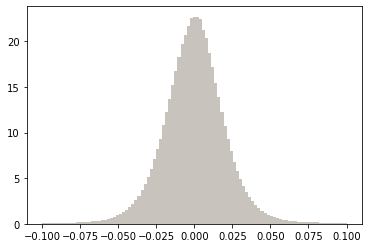

In [17]:
dTest1={}
dTest2={}
dTest3={}

for sKey in dData1.keys():
    dTest1[sKey]=dData1[sKey].flatten()
    
for sKey in dData2.keys():
    dTest2[sKey]=dData2[sKey].flatten()
    
for sKey in dData3.keys():
    dTest3[sKey]=dData3[sKey].flatten()

In [18]:
import matplotlib.pyplot as plt

/project/bioinformatics/DLLab/shared/CondaEnvironments/CooperAutismTF_GPU_v5/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


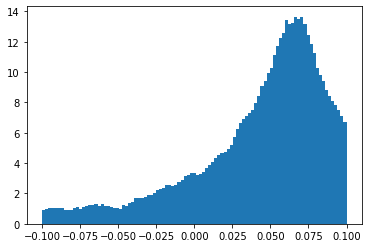

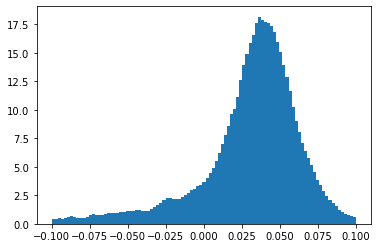

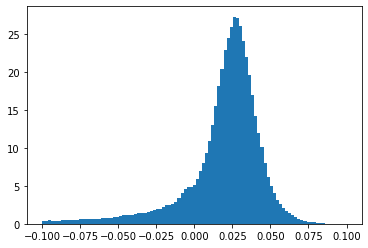

In [19]:
for i in range(3):
    plt.hist(dTest1[lsAtlases[i]],normed=True,
             bins=np.linspace(-0.1,0.1,100))
    plt.show()

/project/bioinformatics/DLLab/shared/CondaEnvironments/CooperAutismTF_GPU_v5/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


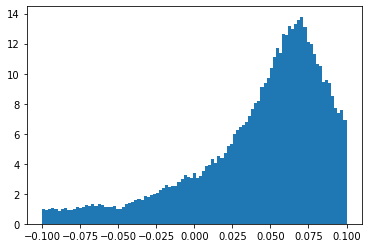

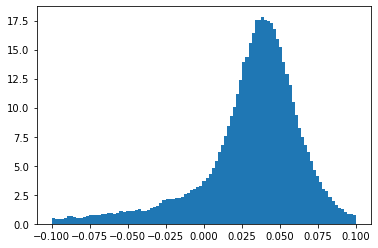

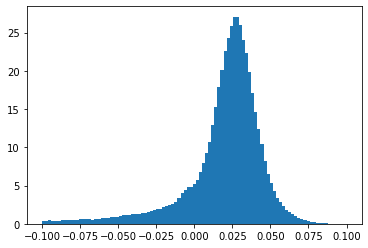

In [20]:
for i in range(3):
    plt.hist(dTest2[lsAtlases[i]],normed=True,
             bins=np.linspace(-0.1,0.1,100))
    plt.show()

/project/bioinformatics/DLLab/shared/CondaEnvironments/CooperAutismTF_GPU_v5/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


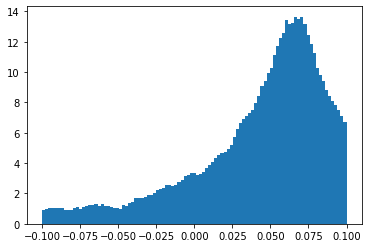

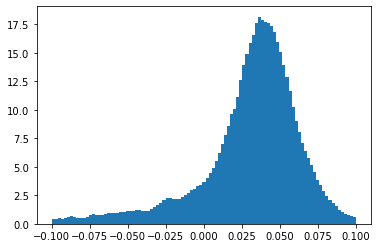

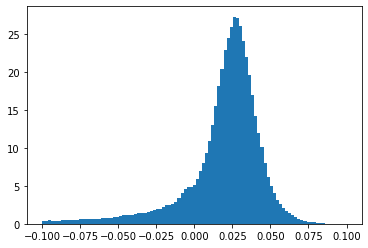

In [21]:
for i in range(3):
    plt.hist(dTest3[lsAtlases[i]], normed=True,
             bins=np.linspace(-0.1,0.1,100))
    plt.show()

In [22]:
import pickle as pkl

In [23]:
Data[0]['connectivity']['basc197'].flatten().std()**2

0.019871239496136874

In [24]:
from scipy.signal import peak_widths

In [15]:
np.std(Data[0]['connectivity']['basc197'].flatten())

0.14096538403500652

In [16]:
peak_widths(Data[0]['connectivity']['basc197'].flatten(), [0])

/project/bioinformatics/DLLab/shared/CondaEnvironments/CooperCausality_v3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PeakPropertyWarning: some peaks have a prominence of 0
  """Entry point for launching an IPython kernel.
/project/bioinformatics/DLLab/shared/CondaEnvironments/CooperCausality_v3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PeakPropertyWarning: some peaks have a width of 0
  """Entry point for launching an IPython kernel.


(array([0.]), array([0.]), array([0.]), array([0.]))

/project/bioinformatics/DLLab/shared/CondaEnvironments/CooperAutismTF_GPU_v5/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


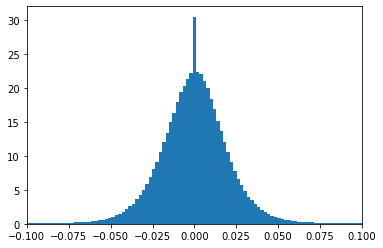

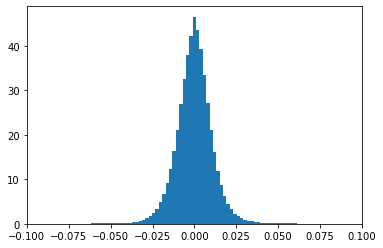

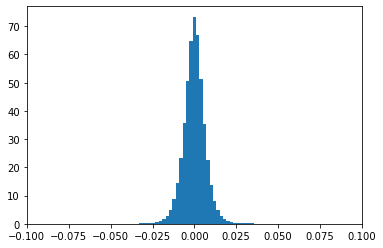

In [25]:
for s in ['basc064', 'basc122', 'basc197']:
    cScaler=skp.RobustScaler()
    plt.hist((Data[0]['connectivity'][s].flatten().reshape(-1,1)), normed=True,
             bins=np.linspace(-0.1,0.1,100))
    plt.xlim((-0.1,0.1))
    plt.show()

# OK, so now the TSE resembles the original data mostly. Time to load up the structural data

In [18]:
sStructDir1='/project/bioinformatics/DLLab/STUDIES/ABIDE1/Derivatives'\
            '/Freesurfer_rerun'
sStructDir2='/project/bioinformatics/DLLab/STUDIES/ABIDE2/Derivatives'\
            '/Freesurfer_rerun'

In [19]:
import pandas as pd
import glob

In [20]:
lsStruct1=glob.glob(f'{sStructDir1}/*.csv')
lsStruct1=[s for s in lsStruct1 if not 'StructuralSummary' in s]
lsStruct2=glob.glob(f'{sStructDir2}/*.csv')
lsStruct2=[s for s in lsStruct2 if not 'StructuralSummary' in s]

In [21]:
pdData1=pd.read_csv(lsStruct1[0])
for sFile in lsStruct1[1:]:
    pdData1=pd.concat([pdData1, pd.read_csv(sFile)], axis=1)
    
pdData2=pd.read_csv(lsStruct2[0])
for sFile in lsStruct2[1:]:
    pdData2=pd.concat([pdData2, pd.read_csv(sFile)], axis=1)

In [22]:
lsSubs1=[s.split('/')[-3] for s in glob.glob(f'{sStructDir1}/*/stats/aseg.stats')]
lsSubs2=[s.split('/')[-3] for s in glob.glob(f'{sStructDir2}/*/stats/aseg.stats')]

In [23]:
pdData1.index=lsSubs1
pdData2.index=lsSubs2

In [24]:
pdData1

,rh.aparc.area,rh_bankssts_area,rh_caudalanteriorcingulate_area,rh_caudalmiddlefrontal_area,rh_cuneus_area,rh_entorhinal_area,rh_fusiform_area,rh_inferiorparietal_area,rh_inferiortemporal_area,rh_isthmuscingulate_area,...,lh_superiorparietal_area,lh_superiortemporal_area,lh_supramarginal_area,lh_frontalpole_area,lh_temporalpole_area,lh_transversetemporal_area,lh_insula_area,lh_WhiteSurfArea_area,BrainSegVolNotVent,eTIV
0051178,50002,993.0,717.0,2991.0,1746.0,352.0,3260.0,5700.0,3854.0,1018.0,...,5554.0,4593.0,4659.0,268.0,466.0,492.0,3086.0,96524.8,1329427.0,1.825321e+06
0050278,50003,896.0,745.0,2300.0,1651.0,421.0,3218.0,5326.0,3622.0,934.0,...,6648.0,3909.0,4742.0,273.0,372.0,517.0,2869.0,95233.4,1269478.0,1.756523e+06
0050257,50004,987.0,835.0,2824.0,1709.0,486.0,3158.0,6910.0,3470.0,948.0,...,5625.0,4864.0,4232.0,260.0,468.0,529.0,2739.0,95554.9,1313766.0,1.701968e+06
0051370,50005,1010.0,650.0,2466.0,1442.0,324.0,3368.0,5694.0,2976.0,911.0,...,5655.0,4112.0,4420.0,282.0,467.0,568.0,2788.0,88885.0,1167665.0,1.564275e+06
0050169,50006,928.0,971.0,2061.0,1683.0,478.0,3627.0,6328.0,4085.0,998.0,...,6291.0,3805.0,3927.0,319.0,446.0,436.0,2409.0,96114.9,1305905.0,1.616245e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0050386,51583,930.0,808.0,2204.0,1939.0,321.0,3848.0,5611.0,4485.0,974.0,...,6943.0,3733.0,4695.0,301.0,574.0,394.0,3293.0,105477.0,1356725.0,1.703393e+06
0051356,51584,993.0,750.0,2352.0,1569.0,659.0,3695.0,5160.0,4935.0,1536.0,...,5773.0,4546.0,4728.0,309.0,539.0,498.0,2758.0,103874.0,1290730.0,1.688640e+06
0050622,51585,911.0,839.0,2314.0,1588.0,489.0,3629.0,6839.0,3824.0,833.0,...,7686.0,4645.0,5644.0,331.0,569.0,494.0,2939.0,100189.0,1211576.0,1.605905e+06
0050700,51606,709.0,717.0,1773.0,2293.0,434.0,3082.0,4968.0,3187.0,1080.0,...,5637.0,4553.0,4465.0,274.0,471.0,495.0,2711.0,86558.6,1154016.0,1.452741e+06


In [25]:
pdData1.to_csv(f'{sStructDir1}/StructuralSummary.csv')
pdData2.to_csv(f'{sStructDir2}/StructuralSummary.csv')

In [49]:
pdData1=pd.read_csv(f'{sStructDir1}/StructuralSummary.csv', index_col=0)
pdData2=pd.read_csv(f'{sStructDir2}/StructuralSummary.csv', index_col=0)

In [50]:
sAutismPath = "/project/bioinformatics/DLLab/Cooper/Code/AutismProject"
sys.path.append(sAutismPath)
def fNormalize(dataset):
    f64mean = dataset.mean(axis=0)
    f64std = dataset.std(axis=0)
    f32norm_dataset = np.float32(dataset-f64mean)/(f64std + 0.000001)
    return f32norm_dataset


In [51]:
import os
import sys
# Set up figure saving
sProjectRootDirectory = "/project/bioinformatics/DLLab/Cooper/Code"
sProjectIdentification = "AutismProject"
sImagesPath = os.path.join(sProjectRootDirectory, sProjectIdentification, "Images")
sAutismStartingKit = "/project/bioinformatics/DLLab/shared/Autism_IMPAC/autism-master"
sDataPath = "/project/bioinformatics/DLLab/shared/Autism_IMPAC/autism-master/data"
sAutismCode = "/project/bioinformatics/DLLab/Cooper/Libraries/paris-saclay-cds-ramp-workflow-v0.2.0-41-g31d4037/paris-saclay-cds-ramp-workflow-31d4037"
sys.path.append(sAutismStartingKit)
sys.path.append(sAutismCode)
sys.path.append(sDataPath)

# import last few modules that were in the path added above (sAutismCode)
from problem import get_train_data, get_cv
from download_data import fetch_fmri_time_series
# Getting the data

RawData, RawLabels = get_train_data(path="/project/bioinformatics/DLLab/Cooper/Jupyter_notebooks/autism-master/autism-master")

###############  sMRI (anatomical MRI)  ###############  
#We select the anatomical data alone
AnatData = RawData[[col for col in RawData.columns if col.startswith('anatomy')]]

# Reselect only the trials that were acceptable (2) or good (1) while throwing out the
# (0) no MPRAGE available and (3) MPRAGE quality is unsatisfactory studies (subject's worth of data)

GoodStudiesIndex = np.where(AnatData.anatomy_select != (0 or 3))
AnatData = AnatData.iloc[GoodStudiesIndex[0]]
AnatLabels = RawLabels[GoodStudiesIndex[0]]
AnatData = AnatData.drop('anatomy_select', axis=1)
NormAnatData = fNormalize(AnatData.values)

# Next, we separate out the categorical variables (imaging site, gender) to one-hot encode them as something the
# algorithm will handle better. 
ParticipantsData = RawData[[col for col in RawData.columns if col.startswith('participants')]]
ParticipantsData = ParticipantsData.iloc[GoodStudiesIndex[0]]

SiteData = ParticipantsData.participants_site.values
SexData = ParticipantsData.participants_sex.values
AgeData = np.float32(ParticipantsData.participants_age.values)

SiteData = to_categorical(SiteData)
SiteData = np.resize(SiteData, (len(SiteData),1))
SexData = to_categorical(SexData == 'F')
SexData = np.resize(SexData, (len(SexData),1))
AgeData = fNormalize(AgeData)
AgeData = np.resize(AgeData, (len(AgeData),1))
#now site, sex, and age are ready for being passed into a machine learning model

#Next, we combine it all (append columns ) into an 2D array for each algorithm to work on
ProcessedData=NormAnatData
# ProcessedData = np.append(NormAnatData, SiteData, axis=1)
# ProcessedData = np.append(ProcessedData, AgeData, axis=1)
# ProcessedData = np.append(ProcessedData, SexData, axis=1)
aConfounders=np.append(SiteData, AgeData, axis=1)
aConfounders=np.append(aConfounders, SexData, axis=1)
#fill NAN locations with 0's
NANloc = np.isnan(aConfounders)
aConfounders[NANloc] = 0

#fill NAN locations with 0's
NANloc = np.isnan(ProcessedData)
ProcessedData[NANloc] = 0
ProcessedTruth = AnatLabels

NameError: name 'to_categorical' is not defined

In [52]:
pdData1

,rh.aparc.area,rh_bankssts_area,rh_caudalanteriorcingulate_area,rh_caudalmiddlefrontal_area,rh_cuneus_area,rh_entorhinal_area,rh_fusiform_area,rh_inferiorparietal_area,rh_inferiortemporal_area,rh_isthmuscingulate_area,...,lh_superiorparietal_area,lh_superiortemporal_area,lh_supramarginal_area,lh_frontalpole_area,lh_temporalpole_area,lh_transversetemporal_area,lh_insula_area,lh_WhiteSurfArea_area,BrainSegVolNotVent.4,eTIV.3
51178,50002,993.0,717.0,2991.0,1746.0,352.0,3260.0,5700.0,3854.0,1018.0,...,5554.0,4593.0,4659.0,268.0,466.0,492.0,3086.0,96524.8,1329427.0,1.825321e+06
50278,50003,896.0,745.0,2300.0,1651.0,421.0,3218.0,5326.0,3622.0,934.0,...,6648.0,3909.0,4742.0,273.0,372.0,517.0,2869.0,95233.4,1269478.0,1.756523e+06
50257,50004,987.0,835.0,2824.0,1709.0,486.0,3158.0,6910.0,3470.0,948.0,...,5625.0,4864.0,4232.0,260.0,468.0,529.0,2739.0,95554.9,1313766.0,1.701968e+06
51370,50005,1010.0,650.0,2466.0,1442.0,324.0,3368.0,5694.0,2976.0,911.0,...,5655.0,4112.0,4420.0,282.0,467.0,568.0,2788.0,88885.0,1167665.0,1.564275e+06
50169,50006,928.0,971.0,2061.0,1683.0,478.0,3627.0,6328.0,4085.0,998.0,...,6291.0,3805.0,3927.0,319.0,446.0,436.0,2409.0,96114.9,1305905.0,1.616245e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50386,51583,930.0,808.0,2204.0,1939.0,321.0,3848.0,5611.0,4485.0,974.0,...,6943.0,3733.0,4695.0,301.0,574.0,394.0,3293.0,105477.0,1356725.0,1.703393e+06
51356,51584,993.0,750.0,2352.0,1569.0,659.0,3695.0,5160.0,4935.0,1536.0,...,5773.0,4546.0,4728.0,309.0,539.0,498.0,2758.0,103874.0,1290730.0,1.688640e+06
50622,51585,911.0,839.0,2314.0,1588.0,489.0,3629.0,6839.0,3824.0,833.0,...,7686.0,4645.0,5644.0,331.0,569.0,494.0,2939.0,100189.0,1211576.0,1.605905e+06
50700,51606,709.0,717.0,1773.0,2293.0,434.0,3082.0,4968.0,3187.0,1080.0,...,5637.0,4553.0,4465.0,274.0,471.0,495.0,2711.0,86558.6,1154016.0,1.452741e+06


In [53]:
lsCol=[f'anatomy_{sCol}' for sCol in pdData1.columns]
pdData1.columns=lsCol

lsCol=[f'anatomy_{sCol}' for sCol in pdData2.columns]
pdData2.columns=lsCol

In [77]:
pdData1=pdData1[[col for col in AnatData.columns]]
aNormABIDE1Data=fNormalize(pdData1.values)
pdABIDE1_Anat=pd.DataFrame(aNormABIDE1Data, index=pdData1.index, columns=pdData1.columns)

pdData2=pdData2[[col for col in AnatData.columns]]
aNormABIDE2Data=fNormalize(pdData2.values)
pdABIDE2_Anat=pd.DataFrame(aNormABIDE2Data, index=pdData2.index, columns=pdData2.columns)

In [57]:
pdIMPAC_Anatomy=dXData['basc064'][[col for col in dXData['basc064'] if 'anatomy' in col]]

In [91]:
cScaler=skp.StandardScaler()
aABIDE1_Anat = fNormalize(pdABIDE1_Anat.values)
aABIDE2_Anat = fNormalize(pdABIDE2_Anat.values)
pdABIDE1_Anat=pd.DataFrame(aABIDE1_Anat, index=pdABIDE1_Anat.index, columns=pdABIDE1_Anat.columns)
pdABIDE2_Anat=pd.DataFrame(aABIDE2_Anat, index=pdABIDE2_Anat.index, columns=pdABIDE2_Anat.columns)

In [93]:
pdABIDE1_Anat.to_csv('/project/bioinformatics/DLLab/Cooper/Code/AutismProject/JournalPaperData/RetestData/ABIDE1_AnatomicalFeatures.csv')
pdABIDE2_Anat.to_csv('/project/bioinformatics/DLLab/Cooper/Code/AutismProject/JournalPaperData/RetestData/ABIDE2_AnatomicalFeatures.csv')

In [74]:
pdIMPAC_Anatomy

,anatomy_lh_bankssts_area,anatomy_lh_caudalanteriorcingulate_area,anatomy_lh_caudalmiddlefrontal_area,anatomy_lh_cuneus_area,anatomy_lh_entorhinal_area,anatomy_lh_fusiform_area,anatomy_lh_inferiorparietal_area,anatomy_lh_inferiortemporal_area,anatomy_lh_isthmuscingulate_area,anatomy_lh_lateraloccipital_area,...,anatomy_SupraTentorialVolNotVentVox,anatomy_MaskVol,anatomy_BrainSegVol-to-eTIV,anatomy_MaskVol-to-eTIV,anatomy_lhSurfaceHoles,anatomy_rhSurfaceHoles,anatomy_SurfaceHoles,anatomy_EstimatedTotalIntraCranialVol,anatomy_eTIV,anatomy_BrainSegVolNotVent
subject_id,,,,,,,,,,,,,,,,,,,,,
1932355398536124106,0.000278,0.000122,0.000537,0.000413,0.000132,0.000795,0.001165,0.000942,0.000256,0.001255,...,0.268124,0.391777,2.395882e-07,3.069642e-07,0.000009,0.000009,0.000017,0.363607,0.363607,0.301674
5174041730092253771,0.000282,0.000161,0.000534,0.000356,0.000103,0.000786,0.001188,0.000785,0.000255,0.001239,...,0.260880,0.399097,1.702476e-07,2.280961e-07,0.000010,0.000012,0.000022,0.386240,0.386240,0.293450
10219322676643534800,0.000252,0.000122,0.000517,0.000582,0.000155,0.000835,0.001318,0.000709,0.000319,0.001743,...,0.257756,0.414925,2.110281e-07,2.949877e-07,0.000013,0.000014,0.000027,0.383442,0.383442,0.292370
10645466564919190227,0.000249,0.000149,0.000628,0.000332,0.000133,0.000953,0.001289,0.000869,0.000260,0.001368,...,0.268251,0.391136,2.141787e-07,2.742942e-07,0.000014,0.000014,0.000028,0.361014,0.361014,0.302496
14512541342641936232,0.000349,0.000139,0.000541,0.000429,0.000170,0.000872,0.001273,0.000927,0.000242,0.001322,...,0.260651,0.407420,1.859781e-07,2.538862e-07,0.000005,0.000010,0.000015,0.375974,0.375974,0.295924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11589489344450896135,0.000177,0.000198,0.000723,0.000406,0.000161,0.000879,0.001021,0.000916,0.000273,0.001334,...,0.256068,0.407849,1.654863e-07,2.293406e-07,0.000006,0.000006,0.000012,0.389919,0.389919,0.291359
14661172306020020468,0.000202,0.000135,0.000620,0.000337,0.000153,0.000831,0.000927,0.000692,0.000229,0.001257,...,0.257388,0.409071,1.905875e-07,2.630046e-07,0.000023,0.000021,0.000044,0.386137,0.386137,0.293865
7789126193351344754,0.000267,0.000125,0.000639,0.000448,0.000137,0.000728,0.001129,0.001028,0.000334,0.001169,...,0.263505,0.390556,1.968688e-07,2.528194e-07,0.000013,0.000014,0.000027,0.372538,0.372538,0.300841


In [76]:
pdABIDE1_Anat

array([[0.18413463],
       [0.11875397],
       [2.30388712],
       ...,
       [0.62417489],
       [0.62417489],
       [0.38176955]])

/project/bioinformatics/DLLab/shared/CondaEnvironments/CooperCausality_v3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


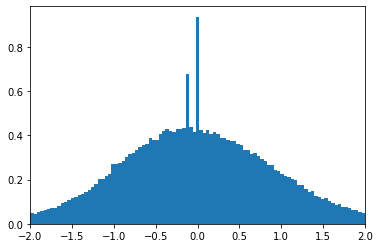

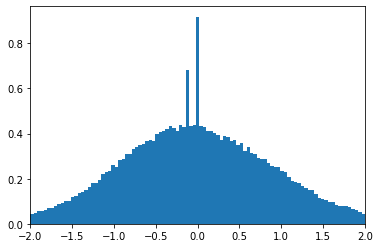

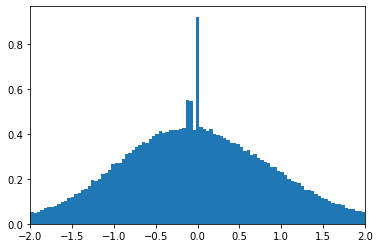

In [33]:
for aData in [pdData1.values, pdData2.values, NormAnatData]:
    plt.hist(aData.flatten(), normed=True, bins=np.linspace(-2,2,100))
    plt.xlim((-2,2))
    plt.show()

# <center>ABIDE I&II Metadata<center>

In [5]:
sABIDE1_Metadata = '/project/bioinformatics/DLLab/STUDIES/ABIDE1/Metadata/Phenotypic_V1_0b.csv'
sABIDE2_Metadata = '/project/bioinformatics/DLLab/STUDIES/ABIDE2/Metadata/ABIDEII_Composite_Phenotypic_Data.csv'

In [6]:
pdABIDE1_Metadata = pd.read_csv(sABIDE1_Metadata, index_col=1)
pdABIDE2_Metadata = pd.read_csv(sABIDE2_Metadata, engine='python', index_col=1)

In [7]:
# in IMPAC training, female=1, male=0
pdABIDE1_Metadata[['SEX']]=pdABIDE1_Metadata[['SEX']]-1
pdABIDE1_Metadata=pdABIDE1_Metadata.loc[pdABIDE1_Metadata['SITE_ID']=='NYU']

In [8]:
pdABIDE2_Metadata[['SEX']]=pdABIDE2_Metadata[['SEX']]-1
pdABIDE2_Metadata_Site1 = pdABIDE2_Metadata.loc[pdABIDE2_Metadata['SITE_ID']==('ABIDEII-NYU_1')]
pdABIDE2_Metadata_Site2 = pdABIDE2_Metadata.loc[pdABIDE2_Metadata['SITE_ID']==('ABIDEII-NYU_2')]

In [11]:
pdABIDE1_Metadata[['DX_GROUP']]=pdABIDE1_Metadata[['DX_GROUP']]-1

In [12]:
pdABIDE2_Metadata[['DX_GROUP']]=pdABIDE2_Metadata[['DX_GROUP']]-1

In [21]:
pdABIDE1_BASC064_AllFeatures=pd.read_csv('/project/bioinformatics/DLLab/Cooper/'\
                                'Code/AutismProject/JournalPaperData/RetestData/ABIDE1_BASC064_AllFeatures.csv',
                                        index_col=0)
pdABIDE2_Site1_BASC064_AllFeatures=pd.read_csv('/project/bioinformatics/DLLab/Cooper/'\
                                'Code/AutismProject/JournalPaperData/RetestData/ABIDE2_Site1_BASC064_AllFeatures.csv',
                                              index_col=0)
pdABIDE2_Site2_BASC064_AllFeatures=pd.read_csv('/project/bioinformatics/DLLab/Cooper/'\
                                'Code/AutismProject/JournalPaperData/RetestData/ABIDE2_Site2_BASC064_AllFeatures.csv',
                                              index_col=0)

The diagnosis key says 1=ASD, 2=HC

In [36]:
(pdABIDE1_Metadata.loc[pdABIDE1_BASC064_AllFeatures.index]['DX_GROUP']==0).astype(int).to_csv(
    '/project/bioinformatics/DLLab/Cooper/Code/AutismProject/JournalPaperData'\
    '/RetestData/ABIDE1_Targets.csv')

/project/bioinformatics/DLLab/shared/CondaEnvironments/CooperAutismTF_GPU_v5/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [35]:
(pdABIDE2_Metadata.loc[pdABIDE2_Site1_BASC064_AllFeatures.index]['DX_GROUP']==0).astype(int).to_csv(
    '/project/bioinformatics/DLLab/Cooper/Code/AutismProject/JournalPaperData'\
    '/RetestData/ABIDE2_Site1_Targets.csv')

/project/bioinformatics/DLLab/shared/CondaEnvironments/CooperAutismTF_GPU_v5/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [37]:
(pdABIDE2_Metadata.loc[pdABIDE2_Site2_BASC064_AllFeatures.index]['DX_GROUP']==0).astype(int).to_csv(
    '/project/bioinformatics/DLLab/Cooper/Code/AutismProject/JournalPaperData'\
    '/RetestData/ABIDE2_Site2_Targets.csv')

/project/bioinformatics/DLLab/shared/CondaEnvironments/CooperAutismTF_GPU_v5/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [39]:
sData='/project/bioinformatics/DLLab/Cooper/Code/AutismProject/AllDataWithConfounds.p'
#Dictionary that containes the whole dataset (train and test) in pd dataframe
[dXData, aYData] = pkl.load(open(sData, 'rb'))

In [40]:
pdXABIDE1Data=pd.DataFrame(columns=dXData['basc064'].columns)

In [41]:
pdXABIDE1Data

,Site01,Site02,Site03,Site04,Site05,Site06,Site07,Site08,Site09,Site10,...,ROI061-ROI061,ROI061-ROI062,ROI061-ROI063,ROI061-ROI064,ROI062-ROI062,ROI062-ROI063,ROI062-ROI064,ROI063-ROI063,ROI063-ROI064,ROI064-ROI064


In [42]:
ls64ROI=[col for col in pdXABIDE1Data.columns if 'ROI' in col]

In [43]:
lsFiles1 = glob.glob(f'{sTSEDir1}/BASC064/*.npy')
lsFiles2 = glob.glob(f'{sTSEDir2}/BASC064/*.npy')
lsFiles3 = glob.glob(f'{sTSEDir3}/BASC064/*.npy')

In [44]:
dData1={}
dData2={}
dData3={}

cScaler=skp.PowerTransformer()
cScaler=skp.RobustScaler()
cScaler2=skp.StandardScaler()
for sAtlas in lsAtlases:
    lsFiles1 = glob.glob(f'{sTSEDir1}/{sAtlas}/*.npy')
    cInverseScaler=skp.RobustScaler()
    cInverseScaler.fit(Data[0]['connectivity']['basc064'].flatten().reshape(-1, 1))
    aData1=np.stack([np.load(sFile) for sFile in lsFiles1]).flatten().reshape(-1, 1)
    cScaler.fit(aData1)

    dData1[sAtlas] = cInverseScaler.inverse_transform((cScaler.fit_transform(aData1)))
    
    lsFiles2 = glob.glob(f'{sTSEDir2}/{sAtlas}/*.npy')
    cInverseScaler=skp.RobustScaler()
    cInverseScaler.fit(Data[0]['connectivity']['basc122'].flatten().reshape(-1, 1))
    aData2=np.stack([np.load(sFile) for sFile in lsFiles2]).flatten().reshape(-1, 1)
    dData2[sAtlas] = cInverseScaler.inverse_transform((cScaler.fit_transform(aData2)))
    
    cInverseScaler=skp.RobustScaler()
    cInverseScaler.fit(Data[0]['connectivity']['basc197'].flatten().reshape(-1, 1))
    lsFiles3 = glob.glob(f'{sTSEDir3}/{sAtlas}/*.npy')
    aData3=np.stack([np.load(sFile) for sFile in lsFiles1]).flatten().reshape(-1, 1)
    dData3[sAtlas] = cInverseScaler.inverse_transform((cScaler.fit_transform(aData3)))

In [45]:
dAllData={}
for sAtlas in ['basc064', 'basc122', 'basc197']:
    lsFiles1 = glob.glob(f'{sTSEDir1}/{sAtlas.upper()}/*.npy')
    lsFiles2 = glob.glob(f'{sTSEDir2}/{sAtlas.upper()}/*.npy')
    lsFiles3 = glob.glob(f'{sTSEDir3}/{sAtlas.upper()}/*.npy')
    
    dData1={int(sFile.split('/')[-1].split('_')[0].split('-')[-1][2:]): list(np.load(sFile)[0,:]) for sFile in lsFiles1 if '.npy' in sFile}
    dData2={int(sFile.split('/')[-1].split('sub-')[1].split('_')[0][:]): list(np.load(sFile)[0,:]) for sFile in lsFiles2 if '.npy' in sFile}
    dData3={int(sFile.split('/')[-1].split('sub-')[1].split('_')[0][:]): list(np.load(sFile)[0,:]) for sFile in lsFiles3 if '.npy' in sFile}
    
    pdData1=pd.DataFrame.from_dict(dData1, orient='index', columns=[col for col in dXData[sAtlas].columns if 'ROI' in col])
    pdData2=pd.DataFrame.from_dict(dData2, orient='index', columns=[col for col in dXData[sAtlas].columns if 'ROI' in col])
    pdData3=pd.DataFrame.from_dict(dData3, orient='index', columns=[col for col in dXData[sAtlas].columns if 'ROI' in col])
    
    cInverseScaler=skp.RobustScaler()
    cScaler=skp.RobustScaler()
    for col in pdData1.columns:
        cInverseScaler.fit(dXData[sAtlas][col].values.reshape(-1,1))
        pdData1[col] = cInverseScaler.inverse_transform(cScaler.fit_transform(pdData1[col].values.reshape(-1,1)))
        pdData2[col] = cInverseScaler.inverse_transform(cScaler.fit_transform(pdData2[col].values.reshape(-1,1)))
        pdData3[col] = cInverseScaler.inverse_transform(cScaler.fit_transform(pdData3[col].values.reshape(-1,1)))
    
    dAllData[sAtlas]={'ABIDE1':pdData1}
    dAllData[sAtlas].update({'ABIDE2_NYU1':pdData2})
    dAllData[sAtlas].update({'ABIDE2_NYU2':pdData3})


In [98]:
for sAtlas in ['basc064', 'basc122', 'basc197']:
    for sDataset in ['ABIDE1', 'ABIDE2_NYU1', 'ABIDE2_NYU2']:
        dAllData[sAtlas][sDataset].to_csv(f'/project/bioinformatics/DLLab/Cooper/Code/'\
             f'AutismProject/JournalPaperData/RetestData/{sDataset}_{sAtlas.upper()}_'\
             f'FunctionalFeatures.csv')


In [47]:
for col in dXData['basc064'].columns:
    print(col)

Site01
Site02
Site03
Site04
Site05
Site06
Site07
Site08
Site09
Site10
Site11
Site12
Site13
Site14
Site15
Site16
Site17
Site18
Site19
Site20
Site21
Site22
Site23
Site24
Site25
Site26
Site27
Site28
Site29
Site30
Site31
Site32
Site33
Site34
Site35
Sex(F=1)
Age
anatomy_lh_bankssts_area
anatomy_lh_caudalanteriorcingulate_area
anatomy_lh_caudalmiddlefrontal_area
anatomy_lh_cuneus_area
anatomy_lh_entorhinal_area
anatomy_lh_fusiform_area
anatomy_lh_inferiorparietal_area
anatomy_lh_inferiortemporal_area
anatomy_lh_isthmuscingulate_area
anatomy_lh_lateraloccipital_area
anatomy_lh_lateralorbitofrontal_area
anatomy_lh_lingual_area
anatomy_lh_medialorbitofrontal_area
anatomy_lh_middletemporal_area
anatomy_lh_parahippocampal_area
anatomy_lh_paracentral_area
anatomy_lh_parsopercularis_area
anatomy_lh_parsorbitalis_area
anatomy_lh_parstriangularis_area
anatomy_lh_pericalcarine_area
anatomy_lh_postcentral_area
anatomy_lh_posteriorcingulate_area
anatomy_lh_precentral_area
anatomy_lh_precuneus_area
anato

In [106]:
pdABIDE1_Metadata['Sex(F=1)']=pdABIDE1_Metadata['SEX']
pdABIDE1_Metadata['Age']=pdABIDE1_Metadata['AGE_AT_SCAN']

pdABIDE2_Metadata['Sex(F=1)']=pdABIDE2_Metadata['SEX']
pdABIDE2_Metadata['Age']=pdABIDE2_Metadata['AGE_AT_SCAN ']

In [109]:
pdABIDE1_Metadata=pdABIDE1_Metadata[['Age', 'Sex(F=1)']]
pdABIDE2_Metadata=pdABIDE2_Metadata[['Age', 'Sex(F=1)']]

In [112]:
pdABIDE1_Metadata.to_csv(f'/project/bioinformatics/DLLab/Cooper/Code/'\
             f'AutismProject/JournalPaperData/RetestData/ABIDE1_Metadata.csv')
pdABIDE2_Metadata.to_csv(f'/project/bioinformatics/DLLab/Cooper/Code/'\
             f'AutismProject/JournalPaperData/RetestData/ABIDE2_Metadata.csv')

# Assemble the testing data

In [113]:
sDataRoot='/project/bioinformatics/DLLab/Cooper/Code/AutismProject/JournalPaperData/RetestData/'

In [207]:
ABIDE1_Anatomical = pd.read_csv(f'{sDataRoot}/ABIDE1_AnatomicalFeatures.csv', index_col=0)
ABIDE1_Meta = pd.read_csv(f'{sDataRoot}/ABIDE1_Metadata.csv', index_col=0)
ABIDE1_BASC064 = pd.read_csv(f'{sDataRoot}/ABIDE1_BASC064_FunctionalFeatures.csv', index_col=0)
ABIDE1_BASC122 = pd.read_csv(f'{sDataRoot}/ABIDE1_BASC122_FunctionalFeatures.csv', index_col=0)
ABIDE1_BASC197 = pd.read_csv(f'{sDataRoot}/ABIDE1_BASC197_FunctionalFeatures.csv', index_col=0)

In [208]:
ABIDE21_Anatomical = pd.read_csv(f'{sDataRoot}/ABIDE2_AnatomicalFeatures.csv', index_col=0)
ABIDE21_Meta = pd.read_csv(f'{sDataRoot}/ABIDE2_Metadata.csv', index_col=0)
ABIDE21_BASC064 = pd.read_csv(f'{sDataRoot}/ABIDE2_NYU1_BASC064_FunctionalFeatures.csv', index_col=0)
ABIDE21_BASC122 = pd.read_csv(f'{sDataRoot}/ABIDE2_NYU1_BASC122_FunctionalFeatures.csv', index_col=0)
ABIDE21_BASC197 = pd.read_csv(f'{sDataRoot}/ABIDE2_NYU1_BASC197_FunctionalFeatures.csv', index_col=0)

In [209]:
ABIDE22_Anatomical = pd.read_csv(f'{sDataRoot}/ABIDE2_AnatomicalFeatures.csv', index_col=0)
ABIDE22_Meta = pd.read_csv(f'{sDataRoot}/ABIDE2_Metadata.csv', index_col=0)
ABIDE22_BASC064 = pd.read_csv(f'{sDataRoot}/ABIDE2_NYU2_BASC064_FunctionalFeatures.csv', index_col=0)
ABIDE22_BASC122 = pd.read_csv(f'{sDataRoot}/ABIDE2_NYU2_BASC122_FunctionalFeatures.csv', index_col=0)
ABIDE22_BASC197 = pd.read_csv(f'{sDataRoot}/ABIDE2_NYU2_BASC197_FunctionalFeatures.csv', index_col=0)

In [218]:
lsABIDE1Index=list(set(ABIDE1_Anatomical.index)&set(ABIDE1_BASC064.index))

In [219]:
lsABIDE21Index=list(set(ABIDE21_Anatomical.index)&set(ABIDE21_BASC064.index))

In [220]:
lsABIDE22Index=list(set(ABIDE22_Anatomical.index)&set(ABIDE22_BASC064.index))

In [221]:
pdABIDE1_BASC064 = pd.DataFrame(index=lsABIDE1Index, columns=dXData['basc064'].columns)
pdABIDE1_BASC122 = pd.DataFrame(index=lsABIDE1Index, columns=dXData['basc122'].columns)
pdABIDE1_BASC197 = pd.DataFrame(index=lsABIDE1Index, columns=dXData['basc197'].columns)

In [222]:
# Set sites to 0
pdABIDE1_BASC064[[col for col in pdABIDE1_BASC064 if 'Site' in col]]=0
pdABIDE1_BASC122[[col for col in pdABIDE1_BASC122 if 'Site' in col]]=0
pdABIDE1_BASC197[[col for col in pdABIDE1_BASC197 if 'Site' in col]]=0

In [223]:
# set metadata values
pdABIDE1_BASC064.loc[lsABIDE1Index][['Age', 'Sex(F=1)']] = ABIDE1_Meta.loc[lsABIDE1Index][['Age', 'Sex(F=1)']]
pdABIDE1_BASC122.loc[lsABIDE1Index][['Age', 'Sex(F=1)']] = ABIDE1_Meta.loc[lsABIDE1Index][['Age', 'Sex(F=1)']]
pdABIDE1_BASC122.loc[lsABIDE1Index][['Age', 'Sex(F=1)']] = ABIDE1_Meta.loc[lsABIDE1Index][['Age', 'Sex(F=1)']]


In [184]:
# set anatomy values
for idx in pdABIDE1_BASC064.index:
    pdABIDE1_BASC064.loc[idx,[col for col in pdABIDE1_BASC064 if 'anatomical' in col]] =\
        ABIDE1_Anatomical.loc[idx][[col for col in pdABIDE1_BASC064 if 'anatomical' in col]]
    print(ABIDE1_Anatomical.loc[idx][[col for col in pdABIDE1_BASC064 if 'anatomical' in col]])
    pdABIDE1_BASC122.loc[idx,[col for col in pdABIDE1_BASC122 if 'anatomical' in col]] =\
        ABIDE1_Anatomical.loc[idx][[col for col in pdABIDE1_BASC122 if 'anatomical' in col]]
    pdABIDE1_BASC197.loc[idx,[col for col in pdABIDE1_BASC197 if 'anatomical' in col]] =\
        ABIDE1_Anatomical.loc[idx,[col for col in pdABIDE1_BASC197 if 'anatomical' in col]]

Series([], Name: 50969, dtype: float64)
Series([], Name: 51110, dtype: float64)
Series([], Name: 51090, dtype: float64)
Series([], Name: 50983, dtype: float64)
Series([], Name: 51008, dtype: float64)
Series([], Name: 51036, dtype: float64)
Series([], Name: 51103, dtype: float64)
Series([], Name: 50970, dtype: float64)
Series([], Name: 50975, dtype: float64)
Series([], Name: 50988, dtype: float64)
Series([], Name: 50993, dtype: float64)
Series([], Name: 50994, dtype: float64)
Series([], Name: 51042, dtype: float64)
Series([], Name: 51055, dtype: float64)
Series([], Name: 51053, dtype: float64)
Series([], Name: 51062, dtype: float64)
Series([], Name: 51119, dtype: float64)
Series([], Name: 50990, dtype: float64)
Series([], Name: 51000, dtype: float64)
Series([], Name: 50992, dtype: float64)
Series([], Name: 51098, dtype: float64)
Series([], Name: 51149, dtype: float64)
Series([], Name: 50952, dtype: float64)
Series([], Name: 51124, dtype: float64)
Series([], Name: 51058, dtype: float64)


In [141]:
# Set roi-roi connection values
pdABIDE1_BASC064[[col for col in pdABIDE1_BASC064 if 'ROI' in col]]=\
    ABIDE1_BASC064[[col for col in ABIDE1_BASC064 if 'ROI' in col]]

pdABIDE1_BASC122[[col for col in pdABIDE1_BASC122 if 'ROI' in col]]=\
    ABIDE1_BASC122[[col for col in ABIDE1_BASC122 if 'ROI' in col]]

pdABIDE1_BASC197[[col for col in pdABIDE1_BASC197 if 'ROI' in col]]=\
    ABIDE1_BASC197[[col for col in ABIDE1_BASC197 if 'ROI' in col]]

In [197]:
(set(pdABIDE1_Anat.index)&set(pdABIDE1_BASC064))

set()

In [183]:
pdABIDE1_BASC197.iloc[37][[col for col in pdABIDE1_BASC197.columns if 'anatomy' in col]]

anatomy_lh_bankssts_area                   NaN
anatomy_lh_caudalanteriorcingulate_area    NaN
anatomy_lh_caudalmiddlefrontal_area        NaN
anatomy_lh_cuneus_area                     NaN
anatomy_lh_entorhinal_area                 NaN
                                          ... 
anatomy_rhSurfaceHoles                     NaN
anatomy_SurfaceHoles                       NaN
anatomy_EstimatedTotalIntraCranialVol      NaN
anatomy_eTIV                               NaN
anatomy_BrainSegVolNotVent                 NaN
Name: 51130, Length: 207, dtype: object

# Create demographic plots

In [1]:
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd

In [7]:
sDir='/project/bioinformatics/DLLab/Cooper/Code/AutismProject/JournalPaperData'

In [10]:
pdABIDE1=pd.read_csv(f'{sDir}/RetestData/IndividualComponents/ABIDE1_Metadata.csv', index_col=0)
pdABIDE2=pd.read_csv(f'{sDir}/RetestData/IndividualComponents/ABIDE2_Metadata.csv', index_col=0)

In [9]:
pdAB1idx=pd.read_csv(f'{sDir}/RetestData/ABIDE1_BASC064_AllFeatures.csv', index_col=0)
pdAB1idx=pd.read_csv(f'{sDir}/RetestData/ABIDE2_Site1_BASC064_AllFeatures.csv', index_col=0)
pdAB1idx=pd.read_csv(f'{sDir}/RetestData/ABIDE2_Site2_BASC064_AllFeatures.csv', index_col=0)

,Age,Sex(F=1)
SUB_ID,,
50952,8.740,1
50953,11.764,1
50954,14.750,1
50955,12.640,1
50956,14.060,1
...,...,...
51153,26.170,0
51154,30.080,0
51155,30.780,0
